#Import

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

 

In [0]:
iris = pd.read_csv("IRIS.csv") #load the dataset form colab


In [0]:
iris.head() #show the  rows from the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
#Removing the unneeded column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
iris.shape #get the shape of the dataset

(150, 5)

# **Data visulaization**

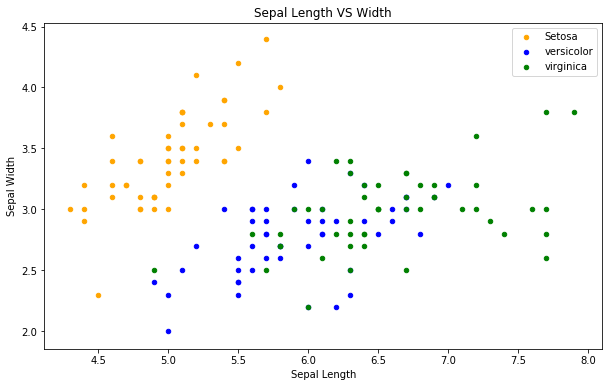

In [0]:
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Setosa')
iris[iris.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

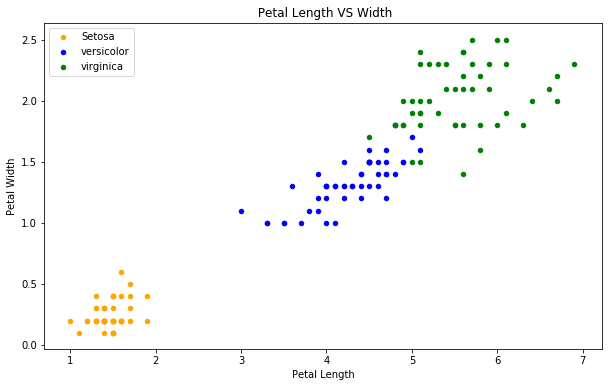

In [0]:
fig = iris[iris.species=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='Setosa')
iris[iris.species=='Iris-versicolor'].plot.scatter(x='petal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='Iris-virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

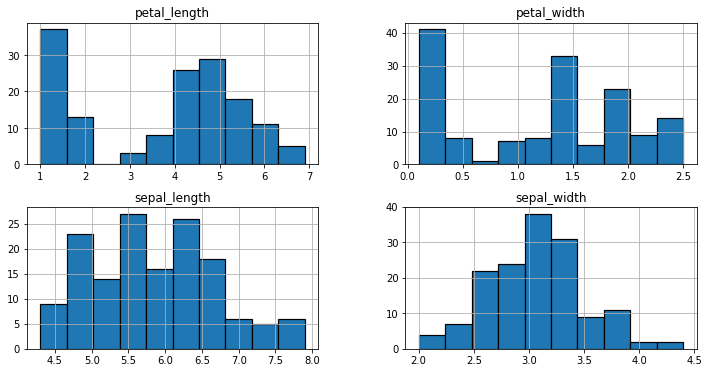

In [0]:
#Now let us see how are the length and width are distributed
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

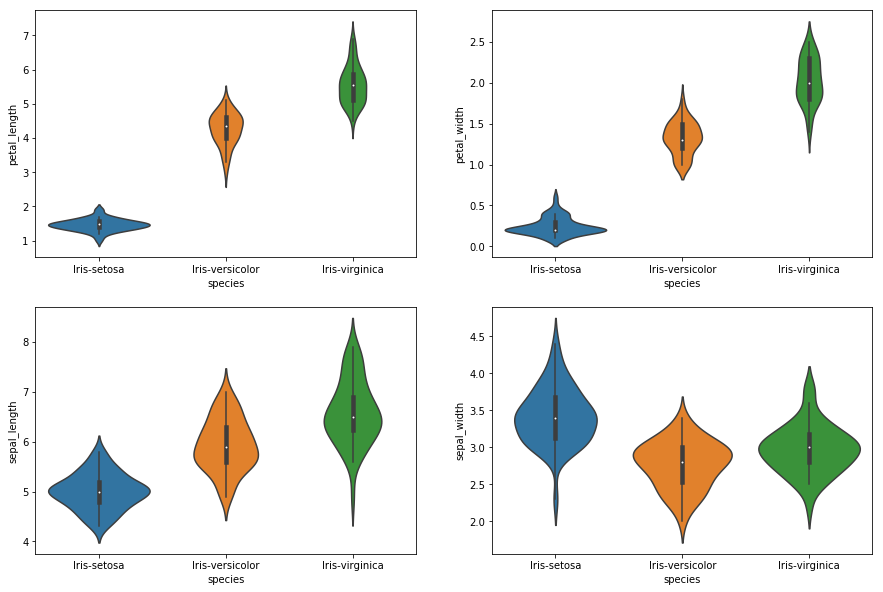

In [0]:
#Now let us see how the length and width vary according to the species
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

**Parallel Plots (Pandas)**


In order to learn parallel plots, we will use famous iris data set from sklearn library
Parallel plot allow to compare the feature of several individual observations on a set of numerical variables.
Each vertical bar represents a feature(column or variable) like petal length (cm).
Values are then plotted as series of lines connected across each axis.
Different colors shows different classes like setosa.
Parallel plot allow to detect interesting patterns. For example as you can see we can easily classify setosa according to petal width (cm) feature.
Lets look at code.
Load iris data into data frame
parallel_coordinates: we import parallel_coordinates from pandas library
colormap: color map that paints classes with different colors

In [0]:
from pandas.plotting import parallel_coordinates #pandas.plotting

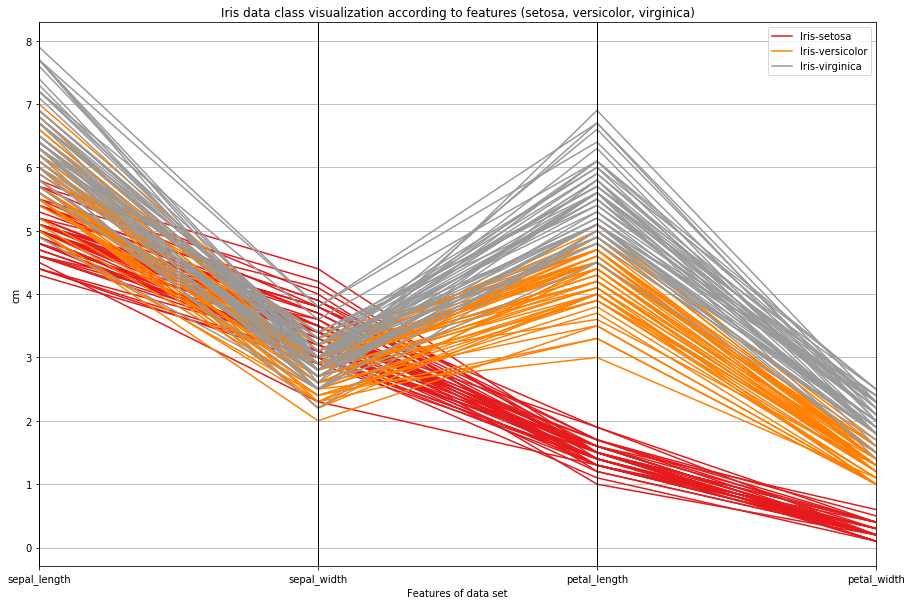

In [0]:



plt.figure(figsize=(15,10))
parallel_coordinates(iris,'species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

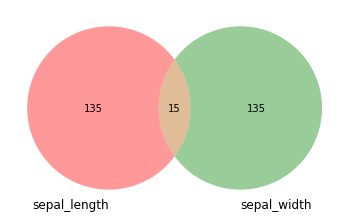

In [0]:
# venn2
from matplotlib_venn import venn2


sepal_length = iris.iloc[:,0]
sepal_width = iris.iloc[:,1]
petal_length = iris.iloc[:,2]
petal_width = iris.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

# **Modeling**

**Now the given problem is a classification problem..**

Thus we will be using the classification algorithms to build a model.
Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

**Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

**attributes**-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

**Target variable**, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [0]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

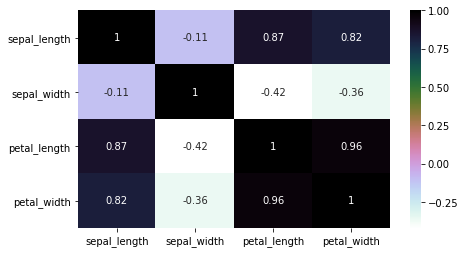

In [0]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

**Observation**--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

**Steps To Be followed When Applying an Algorithm**

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

Then pass the training dataset to the algorithm to train it. We use the .fit() method

Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

We then check the accuracy by passing the predicted outcome and the actual output to the model.

# **Splitting The Data into Training And Testing Dataset**

In [0]:

train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [0]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
test_y =test.species   #output value of test data

**Lets check the Train and Test Dataset**

In [0]:


train_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
70,5.9,3.2,4.8,1.8


In [0]:
test_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
106,4.9,2.5,4.5,1.7
110,6.5,3.2,5.1,2.0


In [0]:
train_y.head()  ##output of the training data

54     Iris-versicolor
70     Iris-versicolor
31         Iris-setosa
79     Iris-versicolor
101     Iris-virginica
Name: species, dtype: object

# **Modeling**

# **Support Vector Machine (SVM)**

In [0]:

model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))





/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


NameError: ignored

# **Decision Tree**

In [0]:

model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


# **K-Nearest Neighbours**

In [0]:

model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9333333333333333


([<matplotlib.axis.XTick at 0x7f9f0728a978>,
 <a list of 10 Text xticklabel objects>)

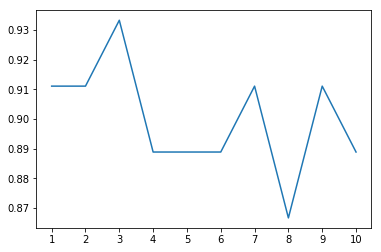

In [0]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

**Creating Petals And Sepals Training Data**







In [0]:
petal=iris[['petal_length','petal_width','species']]
sepal=iris[['sepal_length','sepal_width','species']]




In [0]:

train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal_width','petal_length']]
train_y_p=train_p.species
test_x_p=test_p[['petal_width','petal_length']]
test_y_p=test_p.species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal_width','sepal_length']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_width','sepal_length']]
test_y_s=test_s.species 

# **SVM**

In [0]:
#svm_model = SVC(kernel='linear')
model=svm.SVC()

#svm_model.fit(x_train,y_train)
model.fit(train_x_p,train_y_p) 

#svc_predict = svm_model.predict(x_test)
prediction=model.predict(test_x_p) 

#print('SVM - ',accuracy_score(svc_predict,y_test))
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))


The accuracy of the SVM using Petals is: 0.9777777777777777


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# **Logistic Regression**

In [0]:


#lr_model = LogisticRegression()
model = LogisticRegression()

#lr_model.fit(x_train,y_train)
model.fit(train_x_p,train_y_p) 

#lr_predict = lr_model.predict(x_test)
prediction=model.predict(test_x_p)


#print('Logistic Regression - ',accuracy_score(lr_predict,y_test))
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
# another type of LR
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))



The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# **Decision Tree**

In [0]:

model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


# **K-Nearest Neighbours**

In [0]:

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


In [0]:
#lr_model = LogisticRegression()
model = LogisticRegression()

#lr_model.fit(x_train,y_train)
model.fit(train_x_p,train_y_p) 

#lr_predict = lr_model.predict(x_test)
prediction=model.predict(test_x_p)


#print('Logistic Regression - ',accuracy_score(lr_predict,y_test))
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
